In [2]:
!pip install konlpy
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import konlpy

import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### 데이터 불러오기

In [ ]:
youtube_df = pd.read_csv("/content/유튜브_노을이_댓글_크롤링_20240709.csv")
youtube_df

댓글 내용
0                            11:39 얘들 무슨 대화를 나누고 있을까요?
1                                    아직 안봤지만 다음 영상 내놔요
2    유기견들이 이렇게 훌륭하신 주인을만나 행복하게 지냈으면 얼마나좋을까요입양감사합니다노...
3    노을이 견주님~~빠삐 견주님~~그 어떤 누구보다도 가장 올바르시고 훌륭한 일을하셨네...
4    안녕하세요! 저는 상도중학교에 다니는 3학년 학생입니다. 도덕 수행평가로 댓글을 달...
..                                                 ...
755                            ㄴㅐ가 1분 먼저 태어났다~ 형이라 해라~
756                           이 못생긴애들은 누구냐고 했데 ㅋㅋㅋㅋㅋㅋㅋ
757                                          여락없이 발바리네
758  버려진거 알고 잘키우고 계신거아는데 최근 버려졌다는걸 자꾸 강조하니까 거부감든다 조...
759                           젊고 이쁜 여성이었으면 찰떡이었을텐데...ㅋ

[760 rows x 1 columns]

##2. 단어 분석

In [ ]:
okt =konlpy.tag.Okt()
word_df = pd.DataFrame({'word':okt.nouns(''.join(li for li in youtube_df['댓글 내용'].astype(str)))})
word_df

word
0       얘
1      무슨
2      대화
3      다음
4      영상
...   ...
3790   거부
3791   조심
3792   스레
3793   여성
3794   찰떡

[3795 rows x 1 columns]

In [ ]:
word_df['count']= word_df['word'].str.len()
word_df

word  count
0       얘      1
1      무슨      2
2      대화      2
3      다음      2
4      영상      2
...   ...    ...
3790   거부      2
3791   조심      2
3792   스레      2
3793   여성      2
3794   찰떡      2

[3795 rows x 2 columns]

### 단어 집계표 만들기

In [ ]:
group_df = word_df.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)
group_df

word    n
192     노을  387
498     빠삐  250
738     영상   73
280      둘   51
1168    형제   51
...    ...  ...
504    빠삐도    1
505   빠삐도빠    1
506    빠삐만    1
507    빠삐바    1
599      숨    1

[1199 rows x 2 columns]

In [ ]:
group_df['count']= group_df['word'].str.len()

In [ ]:
group_word_df = group_df.query("count >= 2")
group_word_df

word    n  count
192     노을  387      2
498     빠삐  250      2
738     영상   73      2
1168    형제   51      2
989     진짜   50      2
...    ...  ...    ...
503   빠삐다앙    1      4
504    빠삐도    1      3
505   빠삐도빠    1      4
506    빠삐만    1      3
507    빠삐바    1      3

[962 rows x 3 columns]

### 단어 집계 결과 시각화

In [ ]:
px.bar(group_word_df.head(20),x='word',y='n',text_auto=True)

##3. 워드클라우드 시각화

### 명사 집계표를 활용한 워드 클라우드 시각화

In [ ]:
dic_word = group_word_df.set_index('word').to_dict()['n']
dic_word

{'노을': 387,
 '빠삐': 250,
 '영상': 73,
 '형제': 51,
 '진짜': 50,
 '힐링': 33,
 '강아지': 33,
 '형님': 28,
 '사랑': 27,
 '정말': 24,
 '아이': 23,
 '사람': 21,
 '입양': 20,
 '자주': 18,
 '주인': 18,
 '모습': 16,
 '다음': 16,
 '보고': 15,
 '우리': 14,
 '항상': 13,
 '보기': 13,
 '동생': 13,
 '선물': 13,
 '행복': 13,
 '오늘': 13,
 '다행': 13,
 '지금': 12,
 '매력': 11,
 '생각': 11,
 '세상': 11,
 '목소리': 11,
 '가족': 11,
 '주님': 10,
 '미소': 10,
 '보호자': 10,
 '아빠': 10,
 '녀석': 9,
 '마음': 9,
 '가요': 9,
 '성격': 9,
 '애기': 9,
 '하루': 9,
 '시간': 8,
 '멀미': 8,
 '누구': 8,
 '집사': 8,
 '엄마': 8,
 '마리': 8,
 '모두': 8,
 '견생': 8,
 '언제': 8,
 '유기견': 8,
 '내내': 8,
 '눈물': 8,
 '이름': 8,
 '하나': 7,
 '남자': 7,
 '서로': 7,
 '저희': 7,
 '아가': 7,
 '인스타': 7,
 '계속': 7,
 '형아': 7,
 '덕분': 6,
 '동물': 6,
 '구독': 6,
 '채널': 6,
 '강쥐': 6,
 '모든': 6,
 '얼굴': 6,
 '어쩜': 6,
 '다시': 6,
 '다리': 6,
 '감사': 5,
 '친구': 5,
 '이모': 5,
 '완전': 5,
 '화이팅': 5,
 '역시': 5,
 '얼마나': 5,
 '느낌': 5,
 '바로': 5,
 '매일': 5,
 '그냥': 5,
 '응원': 5,
 '가끔': 5,
 '인연': 5,
 '귀요미': 5,
 '누가': 5,
 '유튜브': 5,
 '소리': 5,
 '견주': 5,
 '정도': 4,
 '나중': 4,
 '투샷': 4,
 '사

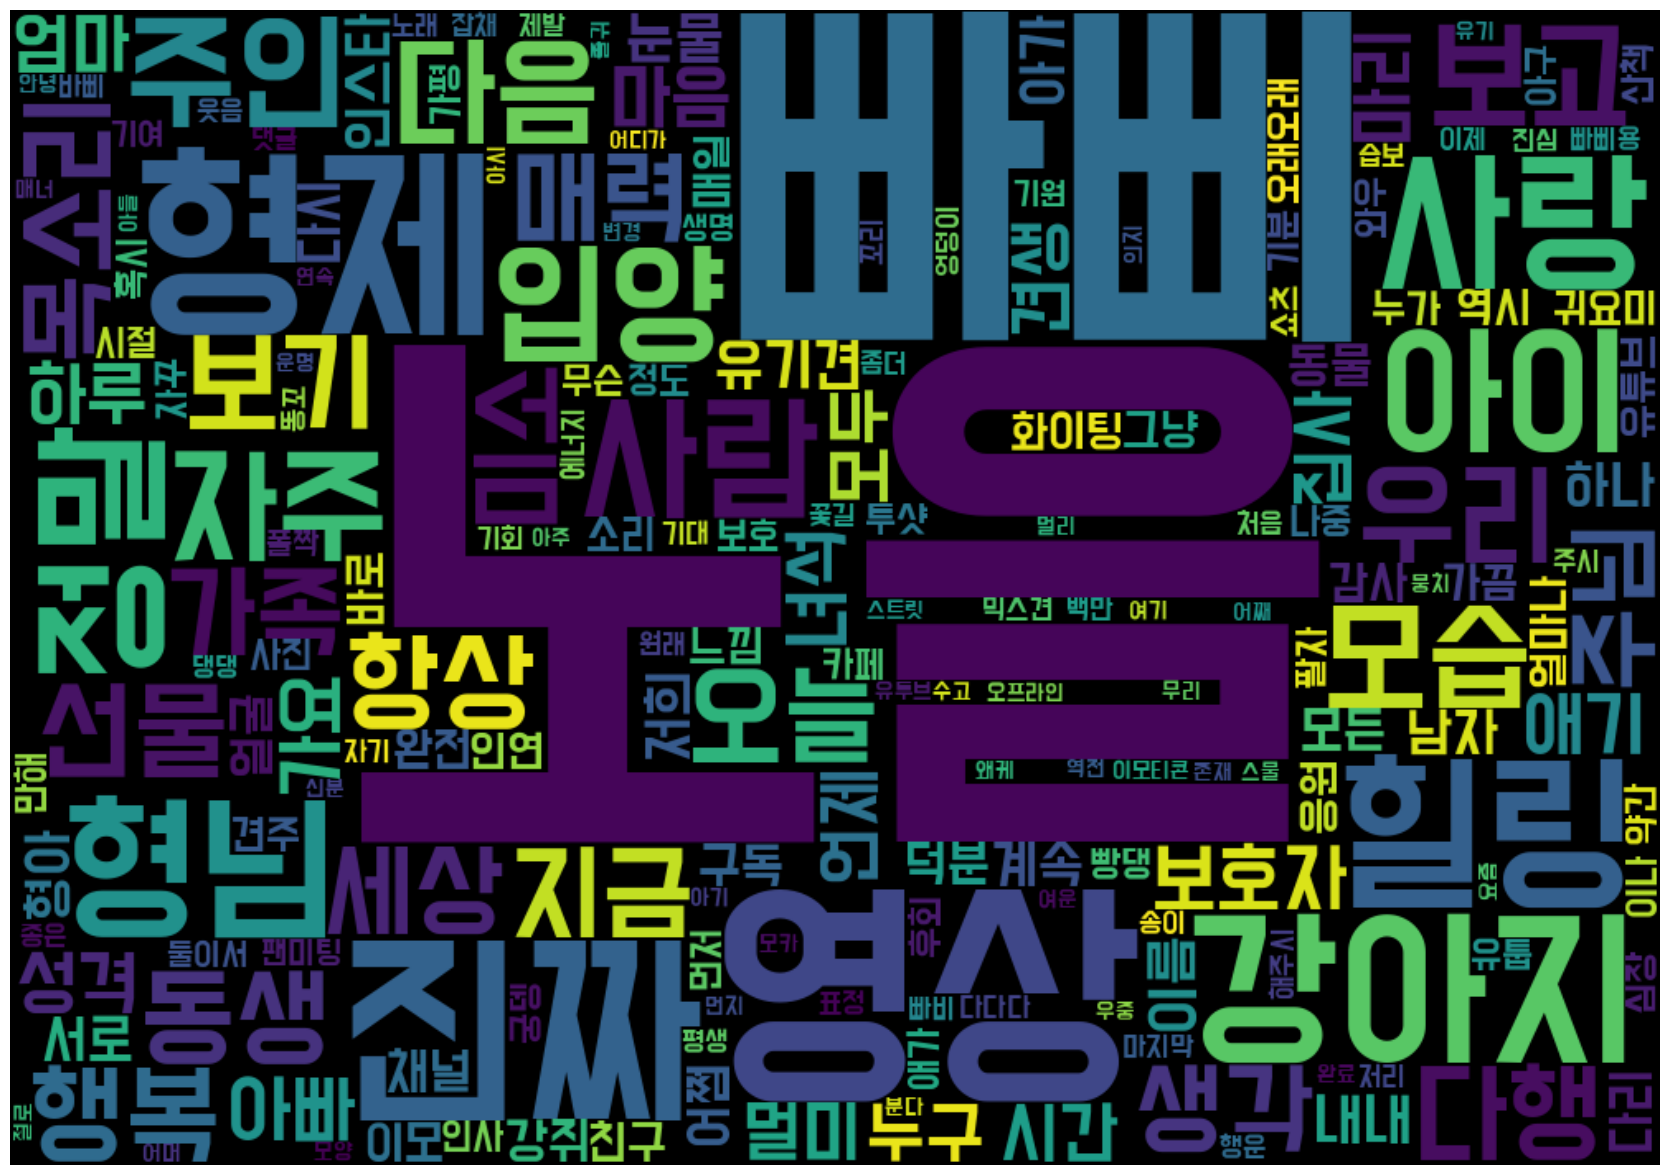

In [ ]:
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))
wc = WordCloud(width=1000, height=700, font_path=font_path,stopwords=STOPWORDS).generate_from_frequencies(dic_word)

plt.axis('off')
plt.imshow(wc,interpolation='bilinear')
plt.show()

### 마스킹을 활용한 워드 클라우드 시각화

In [ ]:
icon1 = Image.open('/content/images.jpg')
icon1

In [4]:
icon2 = Image.open('/content/na.jpg')
icon2

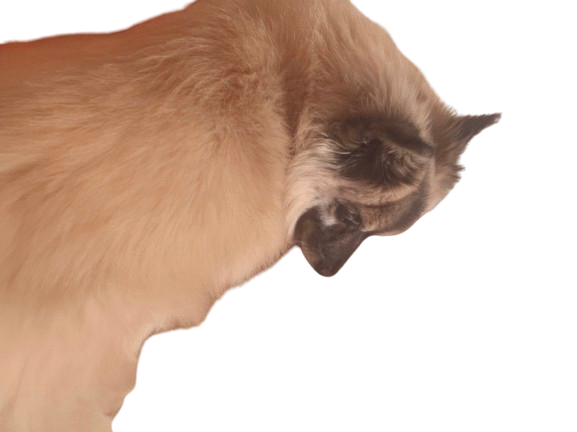

In [5]:
icon3 = Image.open('/content/na-removebg-preview.png')
icon3

In [ ]:
icon = Image.open('/content/na-removebg-preview.png')
mongshell_mask = np.array(icon)

plt.subplots(figsize=(25,15))
wc = WordCloud(width=1000, height=700, background_color='white', font_path=font_path,mask=harry_mask).generate_from_frequencies(dic_word)
plt.axis('off')
img_colors = ImageColorGenerator(harry_mask,default_color=(255,255,255))
wc = wc.recolor(color_func=img_colors)
plt.imshow(wc,interpolation='bilinear')
plt.show()

### 이미지 결과 저장

In [ ]:
wc.to_file(filename='mongshell_word_cloud.png')
print("이미지저장 완료")

이미지저장 완료
